In [26]:
# Data manipulation
import pandas as pd
import numpy as np

# Statsmodels for regression analysis (gives F-test, R², p-values, etc.)
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error


# For visualizations and checking distributions 
import seaborn as sns
import matplotlib.pyplot as plt




In [27]:
df=pd.read_csv("merged_movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"action,adventure,fantasy",6.6,447624
1,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"action,adventure,sci-fi",6.0,24451
2,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"action,adventure,sci-fi",7.3,665594
3,7,"Apr 27, 2018",avengers: infinity war,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"action,adventure,sci-fi",8.5,670926
4,9,"Nov 17, 2017",justice league,"$300,000,000","$229,024,295","$655,945,209",tt0974015,2017,120.0,"action,adventure,fantasy",6.5,329135


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1997 non-null   int64  
 1   release_date       1997 non-null   object 
 2   movie              1997 non-null   object 
 3   production_budget  1997 non-null   object 
 4   domestic_gross     1997 non-null   object 
 5   worldwide_gross    1997 non-null   object 
 6   movie_id           1997 non-null   object 
 7   start_year         1997 non-null   int64  
 8   runtime_minutes    1997 non-null   float64
 9   genres             1997 non-null   object 
 10  averagerating      1997 non-null   float64
 11  numvotes           1997 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 187.3+ KB


,id,start_year,runtime_minutes,averagerating,numvotes
count,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,51.080120,2013.776665,107.204306,6.258237,9.686418e+04
std,28.632538,2.557396,17.419046,1.048842,1.523309e+05
min,1.000000,2010.000000,41.000000,1.600000,3.540000e+02
25%,27.000000,2012.000000,94.000000,5.700000,6.955000e+03
50%,51.000000,2014.000000,105.000000,6.400000,4.132700e+04
75%,76.000000,2016.000000,117.000000,7.000000,1.176380e+05
max,100.000000,2019.000000,192.000000,9.000000,1.841066e+06


In [29]:
# Remove dollar signs and commas, then convert to integer
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_clean:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1997 non-null   int64  
 1   release_date       1997 non-null   object 
 2   movie              1997 non-null   object 
 3   production_budget  1997 non-null   float64
 4   domestic_gross     1997 non-null   float64
 5   worldwide_gross    1997 non-null   float64
 6   movie_id           1997 non-null   object 
 7   start_year         1997 non-null   int64  
 8   runtime_minutes    1997 non-null   float64
 9   genres             1997 non-null   object 
 10  averagerating      1997 non-null   float64
 11  numvotes           1997 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 187.3+ KB


In [30]:
#set the dependent and indepemdemt variable
X = df['production_budget' ] # Independent variable
y = df['worldwide_gross']    # Dependent variable

In [31]:
#Compute Pearson's correlation coefficient
correlation_coefficient, p_value_corr = stats.pearsonr(X, y)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value for Pearson Correlation: {p_value_corr}")

Pearson Correlation Coefficient: 0.7810159722330532
P-Value for Pearson Correlation: 0.0


* The Pearson Correlation Coefficient of 0.78 indicates a strong positive linear relationship between production_budget and worldwide_gross. This means that as the production budget increases, the worldwide gross tends to increase as well, and the correlation is relatively strong
* The p-value of 0.0 suggests that the correlation is statistically significant. A p-value less than 0.05 typically means that the correlation is unlikely to be due to random chance, and thus we can confidently say that there is a meaningful relationship between the two variables.

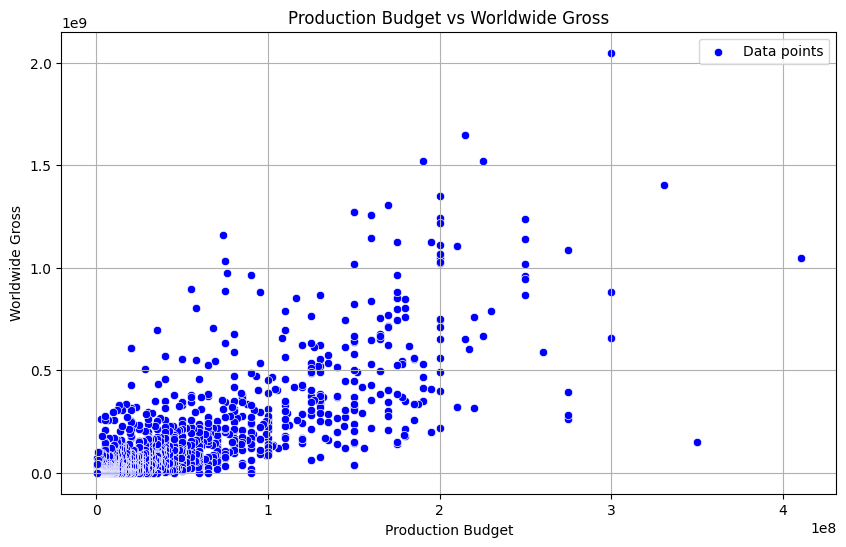

In [32]:
#Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, color='blue', label='Data points')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()


In [42]:
# Fit the regression model
X_with_const = sm.add_constant(X)  # Add intercept term to the model
model = sm.OLS(y, X_with_const)  # Create OLS model
results = model.fit()  # Fit the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3120.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:53:32   Log-Likelihood:                -40199.
No. Observations:                1997   AIC:                         8.040e+04
Df Residuals:                    1995   BIC:                         8.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.199e+06   3.75e+0

In [34]:
# Display the regression parameters (coefficients)
print(f"Intercept (b0): {results.params[0]}")
print(f"Slope (b1): {results.params[1]}")

Intercept (b0): -7198852.082546999
Slope (b1): 3.237940081959137


* The slope of b1= 3.23794 indicates the change in worldwide_gross for each 1 unit increase in the production_budget. Specifically, for every additional dollar spent on the production budget, the model predicts that the worldwide gross will increase by 3.24 dollars on average.
* The equation of the regression line would be:


    **worldwide_gross=−7,198,852.08+3.2379×production_budget**

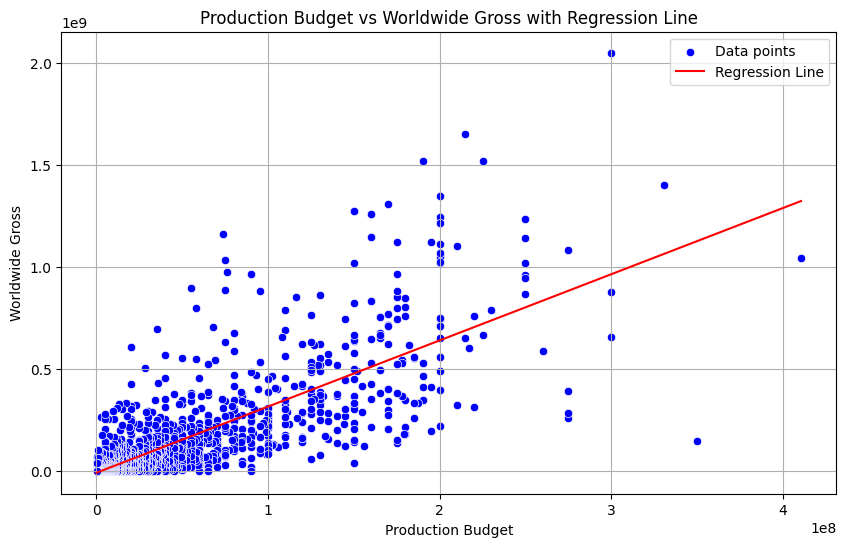

In [35]:
#Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, color='blue', label='Data points')
plt.plot(X, results.params[0] + results.params[1] * X, color='red', label='Regression Line')
plt.title('Production Budget vs Worldwide Gross with Regression Line')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
#F-Test: Test the overall significance of the regression model
f_statistic = results.fvalue
f_pvalue = results.f_pvalue
print(f"F-Statistic: {f_statistic}")
print(f"F-Statistic P-Value: {f_pvalue}")


F-Statistic: 3120.200322365559
F-Statistic P-Value: 0.0


* An F- statistics of  p-value (0.0) means the model is highly statistically significant.hence the Production Budget is a significant predictor of Worldwide Gross.

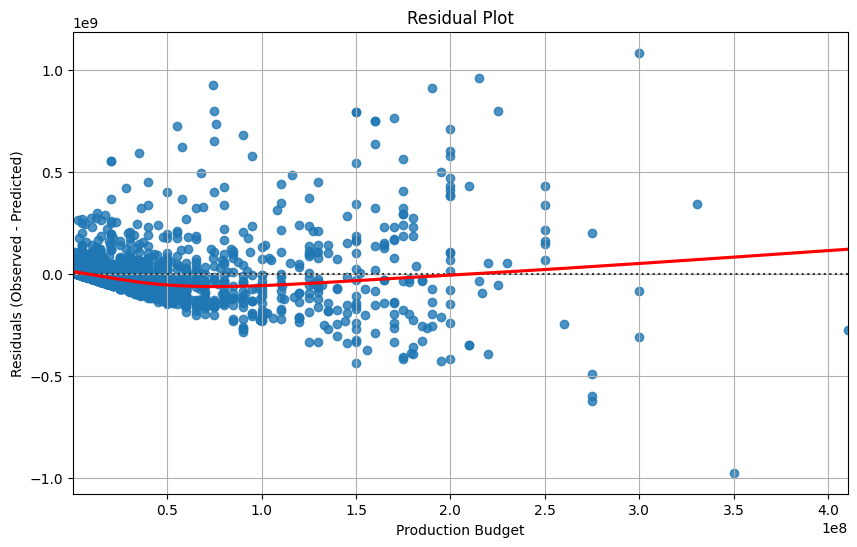

In [38]:
 #residuals to check the fit of the model
# Calculate the predicted values
y_pred = results.predict(X_with_const)

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X, y=y - y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Production Budget')
plt.ylabel('Residuals (Observed - Predicted)')
plt.grid(True)
plt.show()


In [39]:
 #Evaluate the Model
# Coefficient of Determination (R-Squared)

r_squared = results.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.6099859488831516


* Coefficient of Determination (R-Squared): Measures the proportion of variance in the dependent variable that is predictable from the independent variable.


In [ ]:
#  Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

* The Mean Squared Error (MSE) measures the average squared difference between the actual values (observed) and the predicted values from a regression model.

